* https://cloud.google.com/vision/docs/

First enable the your API key to use Cloud Vision - will have to setup a billing account.

Follow the instructions on https://cloud.google.com/docs/authentication/getting-started to download your API key, which is a .json file.

In [1]:
#!pip3 install --upgrade google-cloud

In [2]:
#!pip install --upgrade google-cloud-vision

In [3]:
#!pip install --upgrade google-oauth

In [4]:
import io
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types
from google.oauth2 import service_account

# Import the base64 encoding library.
import base64

# Pass the image data to an encoding function.
def encode_image(image):
    """Encode PIL image."""
    image_content = image.read()
    return base64.b64encode(image_content)

In [5]:
API_file_path = "/Users/robin/Documents/Google_API_key.json"

In [6]:
credentials = service_account.Credentials.from_service_account_file(API_file_path)
scoped_credentials = credentials.with_scopes(['https://www.googleapis.com/auth/cloud-platform'])

In [7]:
# Instantiates a client
client = vision.ImageAnnotatorClient(credentials=scoped_credentials)

Open an image file

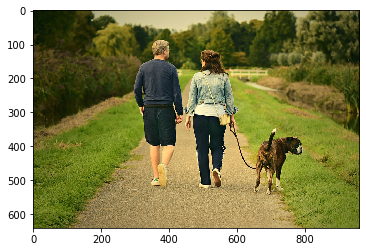

In [17]:
# The name of the image file to annotate
# file_name = 'family.jpg'
file_name = 'test-image3.jpg'

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()


img = plt.imread(file_name)
plt.imshow(img)
plt.show()

## Object

In [18]:
image = types.Image(content=content)
response = client.object_localization(image=image)

In [19]:
objects = response.localized_object_annotations

In [20]:
len(objects)

9

In [22]:
for obj in objects:
    print(obj.name.lower(), obj.score)

pants 0.9225577712059021
shorts 0.9119724631309509
dog 0.8989588618278503
woman 0.8649981617927551
person 0.8431858420372009
person 0.8168189525604248
top 0.7480683922767639
top 0.6955451965332031
outerwear 0.618914783000946


In [13]:
objects[0]

mid: "/m/01g317"
name: "Person"
score: 0.8675968050956726
bounding_poly {
  normalized_vertices {
    x: 0.6397296786308289
    y: 0.1952270120382309
  }
  normalized_vertices {
    x: 0.9642520546913147
    y: 0.1952270120382309
  }
  normalized_vertices {
    x: 0.9642520546913147
    y: 0.9973958134651184
  }
  normalized_vertices {
    x: 0.6397296786308289
    y: 0.9973958134651184
  }
}

Make same request with b64 string

## Face

In [14]:
%%time
image = types.Image(content=content)
response = client.face_detection(image=image)
faces = response.face_annotations  

CPU times: user 4.45 ms, sys: 2.14 ms, total: 6.58 ms
Wall time: 1.41 s


In [15]:
len(faces)

4

In [16]:
# Names of likelihood from google.cloud.vision.enums
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')

print("There are {} faces".format(len(faces)))

print('Faces:')
for face in faces:
    print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
    print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
    print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in face.bounding_poly.vertices])

    print('face bounds: {}'.format(','.join(vertices)))

There are 4 faces
Faces:
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (519,145),(643,145),(643,288),(519,288)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (606,112),(736,112),(736,263),(606,263)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (720,129),(828,129),(828,255),(720,255)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (465,185),(555,185),(555,289),(465,289)
